<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Imports" data-toc-modified-id="Imports-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Imports</a></span></li><li><span><a href="#Load-audios-csv" data-toc-modified-id="Load-audios-csv-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Load audios csv</a></span><ul class="toc-item"><li><span><a href="#Encoding" data-toc-modified-id="Encoding-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Encoding</a></span></li><li><span><a href="#Classification-with-KERAS" data-toc-modified-id="Classification-with-KERAS-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Classification with KERAS</a></span></li></ul></li><li><span><a href="#Model-visualization" data-toc-modified-id="Model-visualization-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Model visualization</a></span></li></ul></div>

# Imports

In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [2]:
from keras import models
from keras import layers
from keras.utils import np_utils

In [3]:
import matplotlib.pyplot as plt

In [4]:
import numpy as np

#  Load audios csv

In [5]:
df = pd.read_pickle("output/newgenres_allfeatures_pickle.pkl")

In [6]:
pd.set_option("display.max_columns",None)
df.head(1)

,beats,fft,label,onset_strength,plp,sample,spectral_band_width,spectral_centroid,spectral_rolloff,sr,zero_crossings,chroma_stft1,chroma_stft2,chroma_stft3,chroma_stft4,chroma_stft5,chroma_stft6,chroma_stft7,chroma_stft8,chroma_stft9,chroma_stft10,chroma_stft11,chroma_stft12,mfcc1,mfcc2,mfcc3,mfcc4,mfcc5,mfcc6,mfcc7,mfcc8,mfcc9,mfcc10,mfcc11,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,tc1,tc2,tc3,tc4,tc5,tc6,tc7,tc8,tc9,tc10,tc11,tc12
0,160.995815,0.003161,Tragedy,0.770123,0.247723,"[0.0031614932, 0.004773572, 0.0039517847, 0.00...",1095.42082,695.430647,1155.376347,22050.0,11599.0,0.625209,0.26436,0.145277,0.126021,0.134681,0.283547,0.267478,0.589635,0.284697,0.130169,0.123678,0.229146,-306.328094,153.603271,24.492928,28.64325,20.572241,3.647248,-1.352207,2.307954,-2.905295,-3.482113,-4.586892,-4.706417,-3.04557,-6.929031,-2.655667,-3.291554,-6.635974,-3.091608,-2.022602,3.165855,0.625209,0.26436,0.145277,0.126021,0.134681,0.283547,0.267478,0.589635,0.284697,0.130169,0.123678,0.229146


In [7]:
df.shape

(4272, 55)

In [8]:
df = df.drop(['sample','sr'],axis=1)

In [9]:
df.label.value_counts()

Adventure    1151
Happy         936
Action        905
Tragedy       789
Horror        491
Name: label, dtype: int64

In [10]:
df = df[df.label.isin(['Adventure','Happy','Action','Tragedy','Horror'])]

In [11]:
df.shape

(4272, 53)

## Encoding

In [12]:
df.label

0       Tragedy
1       Tragedy
2       Tragedy
3       Tragedy
4       Tragedy
         ...   
4267     Action
4268     Action
4269     Action
4270     Action
4271     Action
Name: label, Length: 4272, dtype: object

In [13]:
genre_list = df['label']
encoder = LabelEncoder()
y = encoder.fit_transform(genre_list)

In [14]:
y

array([4, 4, 4, ..., 0, 0, 0])

In [15]:
encoder.classes_

array(['Action', 'Adventure', 'Happy', 'Horror', 'Tragedy'], dtype=object)

In [16]:
y [0]

4

In [17]:
encoder.classes_[np.argmax(y[0])]

'Action'

In [18]:
#representar array en grafico para ver cantidad de "genero"

In [19]:
y= np_utils.to_categorical(y)

In [20]:
y.shape

(4272, 5)

In [21]:
#Select features: Chroma + MFCC + Zero Crossings
X = df.drop(['label'],axis=1).iloc[:,7:40]
X.head(1)

,zero_crossings,chroma_stft1,chroma_stft2,chroma_stft3,chroma_stft4,chroma_stft5,chroma_stft6,chroma_stft7,chroma_stft8,chroma_stft9,chroma_stft10,chroma_stft11,chroma_stft12,mfcc1,mfcc2,mfcc3,mfcc4,mfcc5,mfcc6,mfcc7,mfcc8,mfcc9,mfcc10,mfcc11,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20
0,11599.0,0.625209,0.26436,0.145277,0.126021,0.134681,0.283547,0.267478,0.589635,0.284697,0.130169,0.123678,0.229146,-306.328094,153.603271,24.492928,28.64325,20.572241,3.647248,-1.352207,2.307954,-2.905295,-3.482113,-4.586892,-4.706417,-3.04557,-6.929031,-2.655667,-3.291554,-6.635974,-3.091608,-2.022602,3.165855


In [22]:
# Scale variables
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [23]:
X.shape

(4272, 33)

## Classification with KERAS

In [24]:
y.shape

(4272, 5)

In [25]:
# Neural network

network = models.Sequential()
network.add(layers.Dense(256, activation='relu', input_shape=(X.shape[1],)))
network.add(layers.Dropout(0.3))

network.add(layers.Dense(512, activation='relu'))
network.add(layers.Dropout(0.3))

network.add(layers.Dense(256, activation='relu'))
network.add(layers.Dropout(0.3))

network.add(layers.Dense(128, activation='relu'))
network.add(layers.Dropout(0.3))

network.add(layers.Dense(64, activation='relu'))
network.add(layers.Dropout(0.3))

network.add(layers.Dense(y.shape[-1], activation='softmax'))

In [26]:
#network.summary()

In [27]:
from keras.optimizers import Adam
optimizer = Adam(lr = 0.001)

In [28]:
network.compile(optimizer= optimizer,
              loss='categorical_crossentropy',
                
               metrics=['accuracy'])

In [29]:
history = network.fit(X,
                    y,
                    epochs=40,
                    batch_size=128)


Epoch 1/40
34/34 [==============================] - 1s 4ms/step - loss: 1.5107 - accuracy: 0.3374
Epoch 2/40
34/34 [==============================] - 0s 8ms/step - loss: 1.3448 - accuracy: 0.4561
Epoch 3/40
34/34 [==============================] - 0s 7ms/step - loss: 1.2755 - accuracy: 0.4920
Epoch 4/40
34/34 [==============================] - 0s 6ms/step - loss: 1.1905 - accuracy: 0.5282
Epoch 5/40
34/34 [==============================] - 0s 5ms/step - loss: 1.1414 - accuracy: 0.5552
Epoch 6/40
34/34 [==============================] - 0s 6ms/step - loss: 1.0863 - accuracy: 0.5683
Epoch 7/40
34/34 [==============================] - 0s 6ms/step - loss: 1.0317 - accuracy: 0.5933
Epoch 8/40
34/34 [==============================] - 0s 5ms/step - loss: 0.9854 - accuracy: 0.6111
Epoch 9/40
34/34 [==============================] - 0s 6ms/step - loss: 0.9215 - accuracy: 0.6408
Epoch 10/40
34/34 [==============================] - 0s 6ms/step - loss: 0.8713 - accuracy: 0.6671
Epoch 11/40
34/34 [

In [30]:
#test_loss, test_acc = network.evaluate(X_test,y_test)

# Model visualization

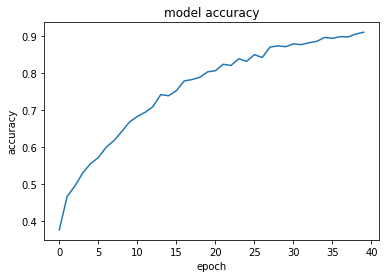

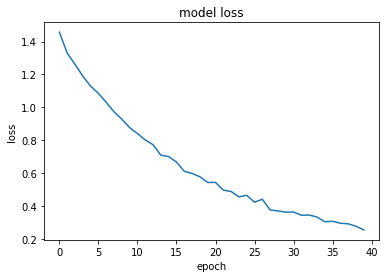

In [32]:

# summarize history for accuracy
plt.plot(history.history['accuracy'])
#plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
#plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
#plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
#plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [33]:
network.save('Output/final_ost_model.h5')